In [2]:
import pandas as pd
import matplotlib.pyplot as plt
# importo le librerie necessarie

In [3]:
arpa_col = ['data', 'ora', 'id_rete_monit', 'comune_istat', 'stazione_istat', 'vento_vel', 'vento_dir', 'std_velt', 
             'baro', 'terma', 'igro', 'rad_dir', 'rad_rif', 'pluv'] 
# definisco i nomi delle colonne di un dataset

In [4]:
arpa = pd.read_csv('Desktop/STRUMENTI/dataset per esercizi/arpa_2.csv', header=None, names=arpa_col)
# con header=None setto l'argomento in modo da non prendere la prima riga come nome colonna
# con names=arpa_col setto l'argomento names con la lista arpa_col di cui sopra
#DATA ORA: espressa nel sistema UTC
#ID_RETE_MONIT: Identificativo della Rete di Monitoraggio
#CODICE_ISTAT_COMUNE: Identificativo della stazione secondo codifica ISTAT 
#PROGR_PUNTO_COM.: Numerazione progressiva delle stazioni con medesimo codice ISTAT
#VELV: Velocita' del vento
#DIRV: Direzione del vento
#DEVST: Deviazione standard della velocita' trasversale
#BARO: Pressione atmosferica
#TERMA: Temperatura dell'aria
#IGRO: Umidita' relativa
#RADD: Radiazione solare diretta
#RADR: Radiazione solare riflessa
#PLUV: Precipitazione

In [5]:
arpa.loc[33:44, ['baro', 'terma', 'igro']] 
# seleziono solo le righe da 33 a 44 con le sole colonne inerenti i valori della pressione atmosferica, temp dell'aria e umidità relativa

,baro,terma,igro
33,998.0,-1.6,88.0
34,997.0,-1.6,92.0
35,996.0,-1.4,92.0
36,996.0,-1.5,92.0
37,995.0,-1.5,93.0
38,995.0,-1.3,96.0
39,995.0,-1.6,97.0
40,994.0,-1.7,97.0
41,994.0,-1.6,98.0
42,995.0,-1.8,98.0


In [6]:
arpa.iloc[33:45, 9:12] 
# seleziono i valori dalla riga 33 a 45 inerenti le colonne 10,11,12 riguardanti terma, igro e rad_dir

,terma,igro,rad_dir
33,-1.6,88.0,9999.9
34,-1.6,92.0,9999.9
35,-1.4,92.0,9999.9
36,-1.5,92.0,9999.9
37,-1.5,93.0,9999.9
38,-1.3,96.0,9999.9
39,-1.6,97.0,9999.9
40,-1.7,97.0,9999.9
41,-1.6,98.0,9999.9
42,-1.8,98.0,9999.9


In [7]:
arpa['vento_triplo'] = arpa['vento_vel'].apply(lambda vel:vel *3)
# aggiungo la colonna vento triplo che moltiplica per 3 il valore di vento_vel
arpa.head(3)

,data,ora,id_rete_monit,comune_istat,stazione_istat,vento_vel,vento_dir,std_velt,baro,terma,igro,rad_dir,rad_rif,pluv,vento_triplo
0,01-01-2001,00:00,17,3032,900,2.5,352.9,9999.9,996.0,-2.2,74.0,9999.9,9999.9,0.0,7.5
1,01-01-2001,01:00,17,3032,900,2.6,354.2,9999.9,999.0,-2.1,70.0,9999.9,9999.9,0.0,7.8
2,01-01-2001,02:00,17,3032,900,2.6,352.3,9999.9,997.0,-2.5,72.0,9999.9,9999.9,0.0,7.8


In [8]:
arpa_al = arpa.drop(['id_rete_monit', 'comune_istat', 'stazione_istat'], axis=1) 
# elimino colonne dalla tabella di cui sopra
arpa_al.head(2)

,data,ora,vento_vel,vento_dir,std_velt,baro,terma,igro,rad_dir,rad_rif,pluv,vento_triplo
0,01-01-2001,00:00,2.5,352.9,9999.9,996.0,-2.2,74.0,9999.9,9999.9,0.0,7.5
1,01-01-2001,01:00,2.6,354.2,9999.9,999.0,-2.1,70.0,9999.9,9999.9,0.0,7.8


In [9]:
arpa_al['mese'] = arpa_al['data'].apply(lambda mese: mese.split('-')[1])
# utilizzo questa funzione per splittare il mese dalla data creando una nuova colonna 
arpa_al.head(2)

,data,ora,vento_vel,vento_dir,std_velt,baro,terma,igro,rad_dir,rad_rif,pluv,vento_triplo,mese
0,01-01-2001,00:00,2.5,352.9,9999.9,996.0,-2.2,74.0,9999.9,9999.9,0.0,7.5,01
1,01-01-2001,01:00,2.6,354.2,9999.9,999.0,-2.1,70.0,9999.9,9999.9,0.0,7.8,01


In [10]:
arpa_al.groupby('mese')
# creami un dataframe raggruppato per mese

In [11]:
arpa_mean = arpa_al.groupby('mese').mean() 
arpa_mean
# mi raggruppa il df arpa_al per singolo mese dandomi i valori mediati 

,vento_vel,vento_dir,std_velt,baro,terma,igro,rad_dir,rad_rif,pluv,vento_triplo
mese,,,,,,,,,,
01,0.398387,7083.604167,9999.9,1010.771371,0.532527,87.811828,9999.9,9999.9,0.088978,1.195161
02,0.950446,4785.901339,9999.9,999.825893,3.224702,73.217262,9999.9,9999.9,0.072917,2.851339
03,0.790457,5459.180376,9999.9,991.384409,7.319489,84.866935,9999.9,9999.9,0.233871,2.371371
04,0.845417,4550.416944,9999.9,994.626389,9.112778,66.573611,9999.9,9999.9,0.053056,2.536250
05,0.579167,6117.658199,9999.9,997.745968,16.109543,75.158602,9999.9,9999.9,0.134409,1.737500
06,0.834444,5340.560000,9999.9,997.805556,18.135972,64.401389,9999.9,9999.9,0.075278,2.503333
07,0.600269,6099.374194,9999.9,997.491935,21.001613,67.830645,9999.9,9999.9,0.053763,1.800806
08,148.439651,6124.360753,9999.9,1120.157258,155.648790,205.514785,9999.9,9999.9,0.150000,445.318952
09,0.733889,5577.871806,9999.9,996.004167,13.651528,77.337500,9999.9,9999.9,0.126389,2.201667


In [12]:
arpa_al.groupby('giorno')
# creami un dataframe raggruppato per giorno

KeyError: 'giorno'

In [16]:
arpa_mean_2 = arpa_al.groupby('giorno').mean() 
arpa_mean_2

,vento_vel,vento_dir,std_velt,baro,terma,igro,rad_dir,rad_rif,pluv,vento_triplo
giorno,,,,,,,,,,
01,0.823958,5520.404514,9999.9,999.812500,11.008681,72.000000,9999.9,9999.9,0.020139,2.471875
02,0.557292,6110.953819,9999.9,1001.190972,10.548611,74.840278,9999.9,9999.9,0.060417,1.671875
03,0.797917,5608.877431,9999.9,998.312500,9.951736,79.788194,9999.9,9999.9,0.043750,2.393750
04,0.551042,6468.051736,9999.9,996.690972,9.378472,84.895833,9999.9,9999.9,0.272222,1.653125
05,0.705556,6035.310069,9999.9,996.871528,10.563542,80.815972,9999.9,9999.9,0.040972,2.116667
06,0.463889,6683.759722,9999.9,997.982639,11.321528,80.243056,9999.9,9999.9,0.094444,1.391667
07,0.440278,7120.672222,9999.9,997.524306,11.218403,84.229167,9999.9,9999.9,0.181250,1.320833
08,0.662153,5862.599653,9999.9,995.781250,11.033681,83.645833,9999.9,9999.9,0.243056,1.986458
09,0.889236,5492.746181,9999.9,996.909722,10.968056,77.864583,9999.9,9999.9,0.159028,2.667708


In [13]:
arpa_mean.index
# mi creo un indice del df raggruppato per singolo mese

Index(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'], dtype='object', name='mese')

In [14]:
arpa_mean_2.index
# mi creo un indice del df raggruppato per singolo giorno del mese

NameError: name 'arpa_mean_2' is not defined

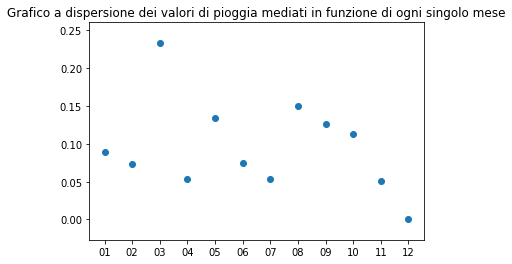

In [19]:
plt.scatter(x=arpa_mean.index, y=arpa_mean['pluv'])
plt.title("Grafico a dispersione dei valori di pioggia mediati in funzione di ogni singolo mese")
plt.show()

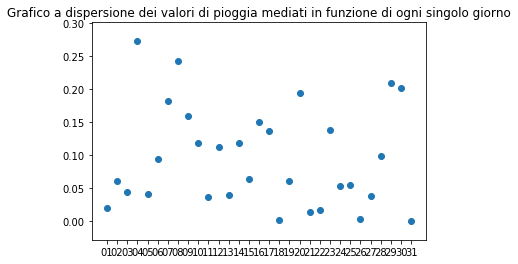

In [20]:
plt.scatter(x=arpa_mean_2.index, y=arpa_mean_2['pluv'])
plt.title("Grafico a dispersione dei valori di pioggia mediati in funzione di ogni singolo giorno")
plt.show()

In [21]:
arpa_min_3 = arpa_al.groupby('pluv').min() 
arpa_min_3.head(2)
# creami un dataframe raggruppandolo per i valori della pioggia dal minimo

,data,ora,vento_vel,vento_dir,std_velt,baro,terma,igro,rad_dir,rad_rif,vento_triplo,giorno,mese
pluv,,,,,,,,,,,,,
0.0,01-01-2001,00:00,0.0,0.0,9999.9,974.0,-11.7,14.0,9999.9,9999.9,0.0,01,01
0.2,01-09-2001,00:00,0.0,0.6,9999.9,979.0,-3.0,17.0,9999.9,9999.9,0.0,01,01


In [22]:
arpa_min_3.index

Float64Index([ 0.0,  0.2,  0.4,  0.6,  0.8,  1.0,  1.2,  1.4,  1.6,  1.8,  2.0,
               2.2,  2.4,  2.6,  2.8,  3.0,  3.2,  3.4,  3.6,  3.8,  4.0,  4.4,
               4.6,  4.8,  5.0,  5.6,  5.8,  6.2,  6.4,  6.6,  6.8,  7.0,  7.2,
               7.6,  8.2,  8.8,  9.4, 10.0, 10.2, 10.4, 11.4, 11.8, 13.2, 14.4,
              22.4, 23.6],
             dtype='float64', name='pluv')

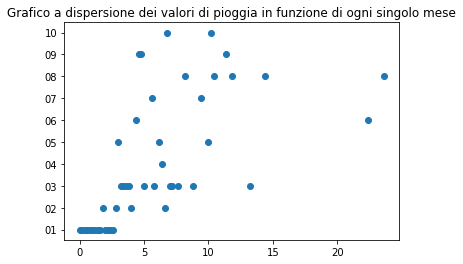

In [23]:
plt.scatter(x=arpa_min_3.index, y=arpa_min_3['mese'])
plt.title("Grafico a dispersione dei valori di pioggia in funzione di ogni singolo mese")
plt.show()

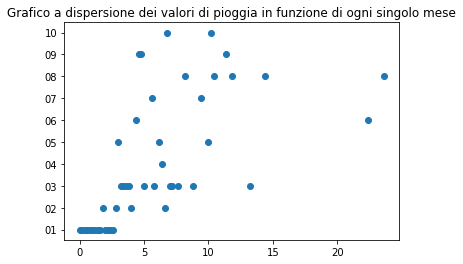

In [24]:
plt.scatter(x=arpa_min_3.index, y=arpa_min_3['mese'])
plt.title("Grafico a dispersione dei valori di pioggia in funzione di ogni singolo mese")
plt.show()

In [31]:
arpa_mean.iloc[1:4, 4:7]
# prendimi dal dataframe arpa_mean solo i mesi da 1 a 4 e le colonne da 4 a 7

,terma,igro,rad_dir
mese,,,
02,3.224702,73.217262,9999.9
03,7.319489,84.866935,9999.9
04,9.112778,66.573611,9999.9


In [32]:
pioggia = arpa_al[arpa_al['pluv'] > 5]
pioggia.shape
# definisco la condizione per cui si prendano i valori con pioggia oltre i 5 mm

(32, 14)

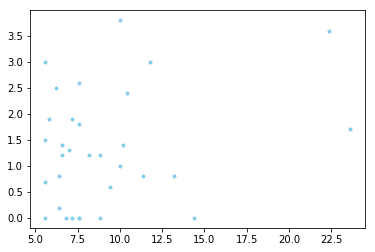

In [33]:
plt.plot(pioggia['pluv'], pioggia['vento_vel'], marker='.', linestyle='', alpha=1, c='skyblue')
plt.show()
# grafico che rappresenta sull'asse x i valori pioggia > 5 mm e su asse y i valori rapportati in termini di velocità del vento

In [34]:
pioggia = arpa_al[arpa_al['pluv'] > 5]
nube = pioggia[pioggia['terma'] > 8]
vento = nube[nube['vento_vel'] > 2]
data = vento ['data']
# applico la mia condizione

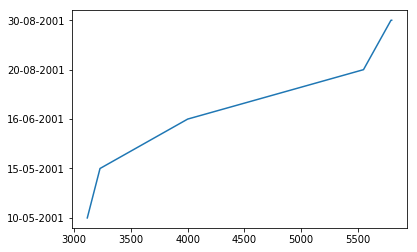

In [61]:
plt.plot(data)
plt.show()
# definita la condizione di cui sopra mostrami il grafico 

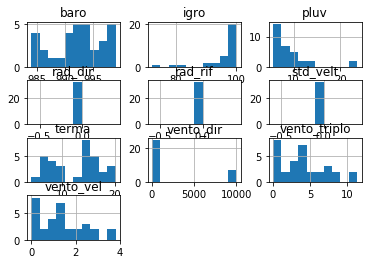

In [68]:
pioggia.hist()
plt.show()
# grafici sottoforma istogramma

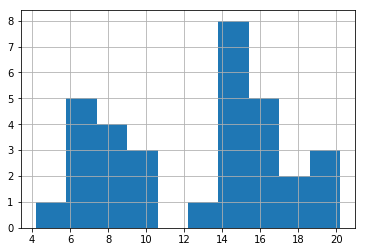

In [66]:
pioggia['terma'].hist()
plt.show()
# grafico ad istogramma con evidenza dei valori vento_vel

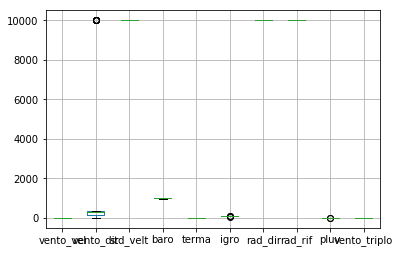

In [38]:
pioggia.boxplot()
plt.show()
# grafico a boxplot

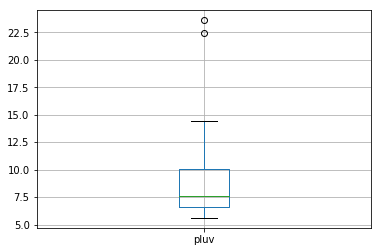

In [39]:
pioggia.boxplot(column='pluv')
plt.show()
# grafico a boxplot con evidenza dei valori pluv

In [41]:
arpa_al[(arpa['pluv'] > 5) & (arpa['terma'] > 8) & (arpa['vento_vel'] > 2)]
#altro modo per effettuare una query di cui sopra

,data,ora,vento_vel,vento_dir,std_velt,baro,terma,igro,rad_dir,rad_rif,pluv,vento_triplo,giorno,mese
3117,10-05-2001,21:00,2.5,351.8,9999.9,998.0,13.3,99.0,9999.9,9999.9,6.2,7.5,10,05
3229,15-05-2001,13:00,3.8,338.9,9999.9,994.0,10.3,100.0,9999.9,9999.9,10.0,11.4,15,05
4001,16-06-2001,17:00,3.6,339.8,9999.9,992.0,13.8,100.0,9999.9,9999.9,22.4,10.8,16,06
5549,20-08-2001,05:00,2.4,5.3,9999.9,995.0,16.0,100.0,9999.9,9999.9,10.4,7.2,20,08
5791,30-08-2001,07:00,3.0,2.3,9999.9,992.0,15.4,100.0,9999.9,9999.9,5.6,9.0,30,08
5797,30-08-2001,13:00,3.0,345.6,9999.9,992.0,20.2,80.0,9999.9,9999.9,11.8,9.0,30,08


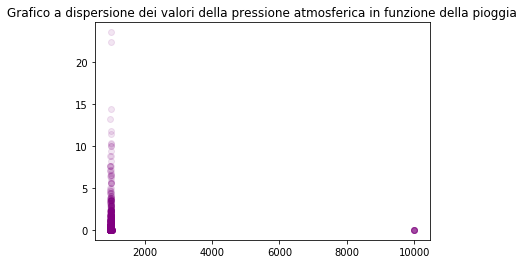

In [43]:
plt.scatter(arpa['baro'], arpa['pluv'], alpha=0.1, c='purple')
plt.title("Grafico a dispersione dei valori della pressione atmosferica in funzione della pioggia")
plt.show()

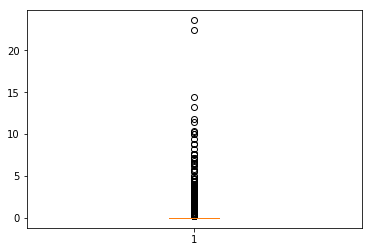

In [44]:
plt.boxplot(arpa['pluv'])
plt.show()

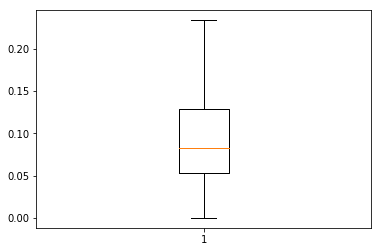

In [45]:
plt.boxplot(arpa_mean['pluv'])
plt.show()

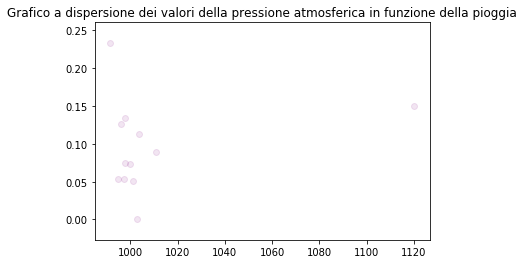

In [46]:
plt.scatter(arpa_mean['baro'], arpa_mean['pluv'], alpha=0.1, c='purple')
plt.title("Grafico a dispersione dei valori della pressione atmosferica in funzione della pioggia")
plt.show()

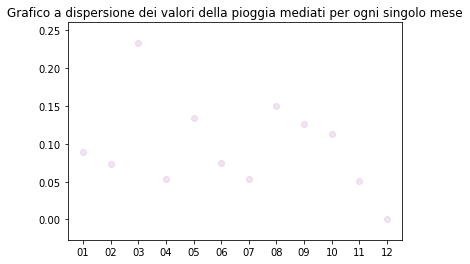

In [57]:
plt.scatter(arpa_mean.index, arpa_mean['pluv'], alpha=0.1, c='purple')
plt.title("Grafico a dispersione dei valori della pioggia mediati per ogni singolo mese")
plt.show()

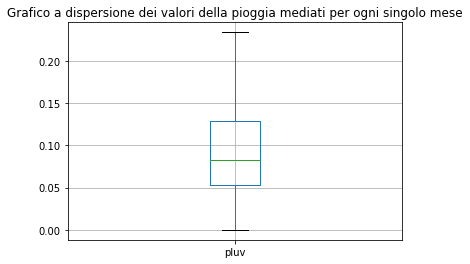

In [58]:
arpa_mean.boxplot(column='pluv')
plt.title('Grafico a dispersione dei valori della pioggia mediati per ogni singolo mese')
plt.show()

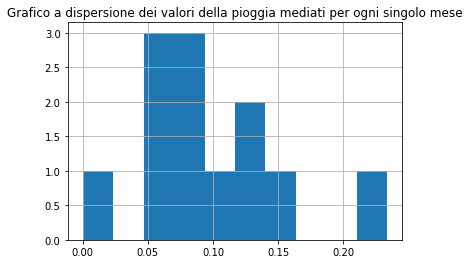

In [63]:
arpa_mean.hist(column='pluv')
plt.title('Grafico a dispersione dei valori della pioggia mediati per ogni singolo mese')
plt.show()